# Convolutional Neural Network

### Importing the libraries

In [1]:
!pip install --upgrade tensorflow keras Pillow

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.6.0'

In [43]:
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, GlobalMaxPooling2D, Flatten, Activation, BatchNormalization, Dropout
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [47]:
!unzip dataset.zip

Archive:  dataset.zip
replace dataset/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [48]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 12000 images belonging to 2 classes.


### Preprocessing the Test set

In [49]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [50]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [51]:
import glob
images = glob.glob('dataset/test_set/cats/*.jpg')

## Part 2 - Building the CNN

### Initialising the CNN

In [52]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [53]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='elu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [54]:
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [55]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3,  activation='elu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [56]:
cnn.add(tf.keras.layers.Flatten())

### Step 3.1 - Stop Overfitting

In [57]:
cnn.add(tf.keras.layers.Dropout(0.1))

### Step 4 - Full Connection

In [58]:
cnn.add(tf.keras.layers.Dense(units=128, activation='elu'))

### Step 5 - Output Layer

In [59]:
cnn.add(tf.keras.layers.Dense(units=1, activation='softmax'))

## Part 3 - Training the CNN

### Compiling the CNN

In [60]:
cnn.compile(optimizer = 'nadam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [62]:
a = cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
375/375 [==============================] - 204s 543ms/step - loss: 0.6407 - accuracy: 0.6667 - val_loss: 0.7385 - val_accuracy: 0.5000
Epoch 2/15
375/375 [==============================] - 203s 541ms/step - loss: 0.6384 - accuracy: 0.6667 - val_loss: 0.7293 - val_accuracy: 0.5000
Epoch 3/15
375/375 [==============================] - 198s 526ms/step - loss: 0.6388 - accuracy: 0.6667 - val_loss: 0.7385 - val_accuracy: 0.5000
Epoch 4/15
375/375 [==============================] - 188s 501ms/step - loss: 0.6386 - accuracy: 0.6667 - val_loss: 0.7598 - val_accuracy: 0.5000
Epoch 5/15
375/375 [==============================] - 189s 503ms/step - loss: 0.6389 - accuracy: 0.6667 - val_loss: 0.7513 - val_accuracy: 0.5000
Epoch 6/15
375/375 [==============================] - 188s 502ms/step - loss: 0.6386 - accuracy: 0.6667 - val_loss: 0.7367 - val_accuracy: 0.5000
Epoch 7/15
375/375 [==============================] - 188s 502ms/step - loss: 0.6383 - accuracy: 0.6667 - val_loss: 0.7313 -

## Part 4 - Plotando alguns gráficos

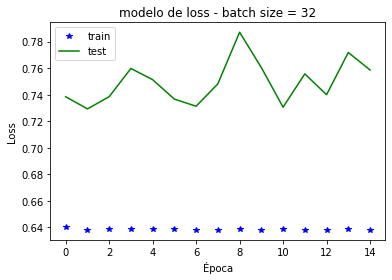

In [63]:
# Treino e teste - loss
plt.figure()
plt.plot(a.history['loss'],'b*',)
plt.plot(a.history['val_loss'],'g')
plt.title('modelo de loss - batch size = '+str(32))
plt.ylabel('Loss')
plt.xlabel('Época')
plt.legend(['train', 'test'], loc='upper left')

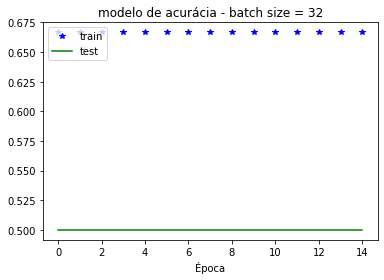

In [66]:
# Treino e teste - acurácia
plt.figure()
plt.plot(a.history['accuracy'],'b*',)
plt.plot(a.history['val_accuracy'],'g')
plt.title('modelo de acurácia - batch size = '+str(32))
plt.xlabel('Época')
plt.legend(['train', 'test'], loc='upper left')


## Part 5 - Making a single prediction

In [67]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f90d79a4560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


In [68]:
print(prediction)   

dog


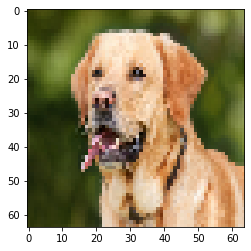

In [70]:
aa = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
plt.imshow(aa)
plt.show()

## Fim.
